In [1]:
import pandas as pd
import numpy as np

C:\Users\zhengzong\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## 计算时间差变化

In [2]:
df_mean_time_18 = pd.read_csv("./18年平均时间差.csv")
df_mean_time_20 = pd.read_csv("./20年平均时间差.csv")

In [3]:
df_mean_time_18 = df_mean_time_18.set_index(['卡号'])
df_mean_time_20 = df_mean_time_20.set_index(['卡号'])
df_mean_time_18.columns = ['18年时间差']
df_mean_time_20.columns = ['20年时间差']

In [4]:
df_mean_time_18.shape,df_mean_time_20.shape

((9920078, 1), (1922246, 1))

#### 选取18年和20年都存在的卡号

In [5]:
result = pd.concat([df_mean_time_18 ,df_mean_time_20], axis=1, join="inner")
result['18年时间差'] = pd.to_timedelta(result['18年时间差'])
result['20年时间差'] = pd.to_timedelta(result['20年时间差'])

In [6]:
result

,18年时间差,20年时间差
卡号,,
1902,0 days 00:26:57.900000,0 days 00:34:24.319444444
2201,0 days 00:46:49,0 days 00:12:20
2584,0 days 00:38:42,0 days 01:10:55
12203,0 days 00:24:01.428571428,0 days 00:24:10.384615384
15949,0 days 00:22:07,0 days 00:12:32
...,...,...
205000587493,0 days 00:20:59,0 days 00:16:30.890625
205000589854,0 days 00:33:55,0 days 00:25:16
205000590423,0 days 00:29:30,0 days 00:10:17.200000


### 20年的时间差 减去 18年时间差

In [7]:
result['时间差'] = result['20年时间差'] - result['18年时间差'] 
result['时间差']

卡号
1902           0 days 00:07:26.419444444
2201                   -1 days +23:25:31
2584                     0 days 00:32:13
12203          0 days 00:00:08.956043956
15949                  -1 days +23:50:25
                          ...           
205000587493    -1 days +23:55:31.890625
205000589854           -1 days +23:51:21
205000590423    -1 days +23:40:47.200000
205000591224           -1 days +23:35:03
301010060324             0 days 00:00:03
Name: 时间差, Length: 309740, dtype: timedelta64[ns]

将时间差换算成分钟和小时为单位

In [8]:
result['时间差_秒'] = result['时间差'].apply(lambda x:x.total_seconds())
result['时间差_分钟'] = result['时间差'].apply(lambda x:x.total_seconds()/60)
result['时间差_小时'] = result['时间差'].apply(lambda x:x.total_seconds()/3600)

In [9]:
result

,18年时间差,20年时间差,时间差,时间差_秒,时间差_分钟,时间差_小时
卡号,,,,,,
1902,0 days 00:26:57.900000,0 days 00:34:24.319444444,0 days 00:07:26.419444444,446.419444,7.440324,0.124005
2201,0 days 00:46:49,0 days 00:12:20,-1 days +23:25:31,-2069.000000,-34.483333,-0.574722
2584,0 days 00:38:42,0 days 01:10:55,0 days 00:32:13,1933.000000,32.216667,0.536944
12203,0 days 00:24:01.428571428,0 days 00:24:10.384615384,0 days 00:00:08.956043956,8.956043,0.149267,0.002488
15949,0 days 00:22:07,0 days 00:12:32,-1 days +23:50:25,-575.000000,-9.583333,-0.159722
...,...,...,...,...,...,...
205000587493,0 days 00:20:59,0 days 00:16:30.890625,-1 days +23:55:31.890625,-268.109375,-4.468490,-0.074475
205000589854,0 days 00:33:55,0 days 00:25:16,-1 days +23:51:21,-519.000000,-8.650000,-0.144167
205000590423,0 days 00:29:30,0 days 00:10:17.200000,-1 days +23:40:47.200000,-1152.800000,-19.213333,-0.320222


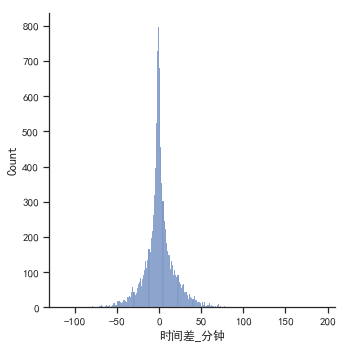

In [11]:
import seaborn as sns
sns.set_theme(style="whitegrid")
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=result[0:10000],
    x="时间差_分钟", 
    palette="ch:rot=-.25,hue=1,light=.75",
)

上面的图为密度直方图，反应的是时间差的分布情况，从上面的时间差_分钟图中可以看出，基本呈现以0为均值的正态分布，基本集中在-50分钟到+50分钟的变化之间

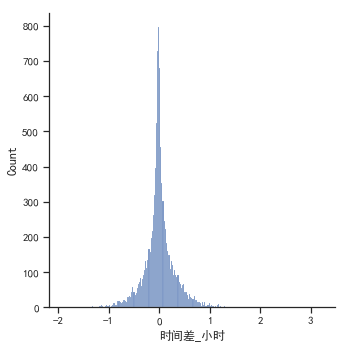

In [12]:
import seaborn as sns


# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=result[0:10000],
    x="时间差_小时", 
    palette="ch:rot=-.25,hue=1,light=.75",
)

同理，这是单位转化为小时的密度直方图

In [14]:
result['时间差_小时'].describe()

count    309595.000000
mean         55.152327
std        1853.624790
min         -14.269491
25%          -0.213333
50%          -0.006635
75%           0.235139
max      219959.874250
Name: 时间差_小时, dtype: float64

从数据的比较中可以更明显的看出，做差后的均值是+55小时，也就是说20年的时间差在总体情况上是要大于18年的时间差的。